# 🎓 Project: Predicting Student Exam Scores using Multi-Linear Regression

## 🧠 Goal:
Use a multi-linear regression model to predict students' final grades (`G3`) based on study-related features like:
- Study time
- Past grades (G1, G2)
- Number of failures
- Absences

---

## 📦 Dataset: Student Performance Dataset

- Source: UCI ML Repository  
  → https://archive.ics.uci.edu/ml/datasets/Student+Performance  
- File to use: `student-mat.csv` (Math scores)  
- Target variable: `G3` (final grade)  
- Features to consider: `G1`, `G2`, `studytime`, `failures`, `absences`

---

# 🔹 Step 1: Load the Dataset
- Load the CSV file into a dataframe.
- Preview first few rows.
- Check shape, column names, and data types.

---

# 🔹 Step 2: Understand the Features
- Print summary statistics.
- Identify numeric features.
- Decide which columns to use as independent variables (X).
- Define the dependent variable (`G3`) as your target (y).

---

# 🔹 Step 3: Clean the Data
- Drop irrelevant columns if any (like school name, address).
- Focus on numeric columns only.
- Check for missing values or outliers.

---

# 🔹 Step 4: Exploratory Data Analysis (EDA)
- Plot distributions of numeric features (histograms, boxplots).
- Create correlation heatmap.
- Scatterplots of each feature vs `G3` to observe trends.

---

# 🔹 Step 5: Prepare the Data
- Create feature matrix `X` and target vector `y`.
- Split the dataset into training and test sets (e.g., 80/20).
- (Optional) Scale features if needed.

---

# 🔹 Step 6: Train the Model
- Use Linear Regression from a library like scikit-learn.
- Fit the model on training data.

---

# 🔹 Step 7: Evaluate the Model
- Predict on test data.
- Evaluate using:
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - R² Score
- Comment on model accuracy.

---

# 🔹 Step 8: Visualize Results
- Plot Actual vs Predicted values.
- Plot residuals (errors).
- Highlight any obvious overfitting or underfitting patterns.

---

# 🔹 Step 9: Conclusion
- Summarize how well the model performed.
- Which features were most influential?
- Any next steps or improvements you would make?

---

# 🚀 Bonus Ideas (Optional)
- Add categorical features by encoding (like `school`, `sex`, `study support`).
- Try using only early grades (`G1`, `G2`) vs. using all features.
- Use the second dataset (`student-por.csv`) and compare results.


-------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load the Dataset

In [2]:
df = pd.read_csv('data/student-mat.csv', sep = ';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.shape

(395, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

----
#### Step 2: Understand the Features

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


- For Linear Regression, we only want to consider numeric attributes as independent variables (X)
- For y, we will consider G3

----
#### Step 3: Clean the Data

In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
# dropping up irrelevent columns (we will create another df with only essential columns, as to save our efforts)
num_df = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences', 'G1', 'G2', 'G3']]


In [9]:
num_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,5,4,6,10,10


In [10]:
num_df.isnull().count() # no missing value, all cleaned up!

age           395
Medu          395
Fedu          395
traveltime    395
studytime     395
failures      395
famrel        395
freetime      395
goout         395
Dalc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64

In [11]:
# slight insights (age 20 gets the best mean of G3 )
num_df.groupby('age').mean(numeric_only = True)

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3
age,,,,,,,,,,,,,,
15,3.036585,2.756098,1.365854,2.158537,0.268293,4.000000,3.280488,2.743902,1.353659,3.585366,3.341463,11.231707,11.365854,11.256098
16,2.826923,2.576923,1.403846,1.875000,0.230769,3.836538,3.230769,3.173077,1.432692,3.701923,5.451923,10.942308,11.182692,11.028846
17,2.612245,2.469388,1.459184,2.020408,0.244898,3.908163,3.224490,3.204082,1.520408,3.500000,6.459184,10.897959,10.479592,10.275510
18,2.707317,2.475610,1.585366,2.146341,0.292683,4.024390,3.121951,3.304878,1.548780,3.439024,6.048780,10.719512,10.134146,9.548780
19,2.166667,2.041667,1.458333,2.083333,1.166667,3.875000,3.250000,2.916667,1.458333,3.500000,10.458333,10.250000,9.250000,8.208333
20,3.000000,2.000000,1.333333,2.000000,1.333333,5.000000,4.666667,3.333333,2.000000,4.000000,5.000000,13.666667,13.666667,14.000000
21,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,5.000000,3.000000,3.000000,3.000000,3.000000,10.000000,8.000000,7.000000
22,3.000000,1.000000,1.000000,1.000000,3.000000,5.000000,4.000000,5.000000,5.000000,1.000000,16.000000,6.000000,8.000000,8.000000


---
####  Step 4: Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Age Distribution')

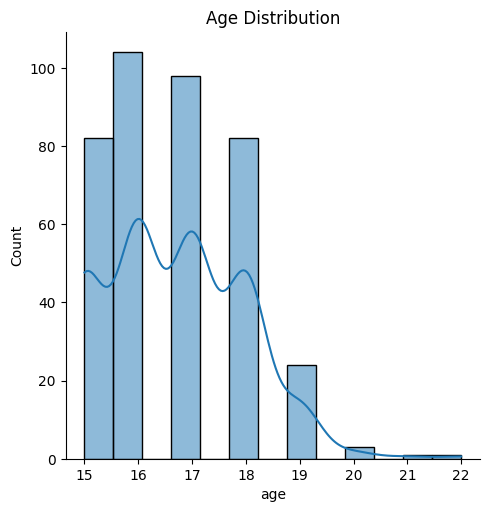

In [12]:
sns.displot(data = num_df, x = 'age', kde = True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'G1 VS G3')

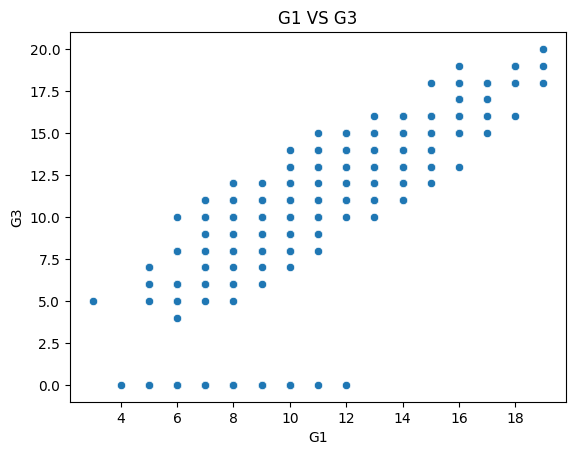

In [13]:
sns.scatterplot(data = num_df, x = 'G1', y = 'G3')
plt.title('G1 VS G3')

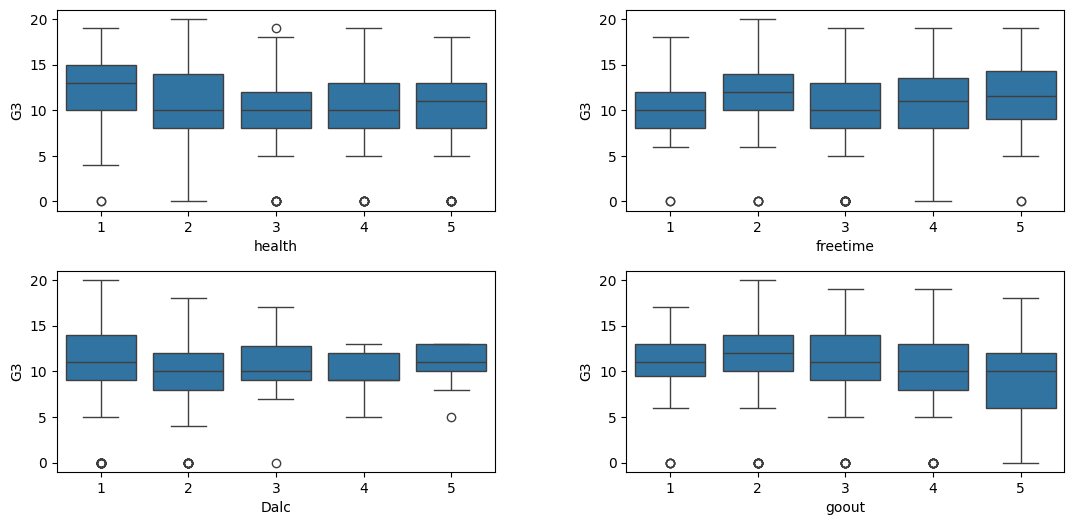

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(13, 6)) # 2 row, 2 columns

sns.boxplot(data = num_df, x = 'health', y = 'G3', ax = axes[0][0])
sns.boxplot(data = num_df, x = 'freetime', y = 'G3', ax = axes[0][1])
sns.boxplot(data = num_df, x = 'Dalc', y = 'G3', ax = axes[1][0])
sns.boxplot(data = num_df, x = 'goout', y = 'G3', ax = axes[1][1])

fig.subplots_adjust(wspace = 0.3, hspace = 0.3)

-----
####  Step 5: Prepare the Data

In [15]:
# seperate out features and the label
X = num_df.drop('G3', axis=1)
y = num_df['G3']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# creating a train test split (80 - 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,health,absences,G1,G2
181,16,3,3,1,2,0,4,2,3,1,3,2,12,13
194,16,2,3,2,1,0,5,3,3,1,3,0,13,14
173,16,1,3,1,2,3,4,3,5,1,3,0,8,7
63,16,4,3,1,3,0,3,4,4,2,4,2,10,9
253,16,2,1,2,1,0,3,3,2,1,3,0,8,9


In [19]:
y_train.head() # ensure proper index 

181    12
194    14
173     0
63      9
253     8
Name: G3, dtype: int64

----
#### Step 6: Train the Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model

LinearRegression()

In [22]:
# fit the traing set into the model
model.fit(X_train, y_train)

LinearRegression()

----
#### Step 7: Evaluate the Model

In [23]:
# Actual prediciton of unseen data (testing our model)
predictions = model.predict(X_test)
predictions

array([ 5.9853079 , 12.06478632,  3.09324731,  9.21005501,  7.64412538,
       12.01378251, 19.0125386 ,  7.13027458,  7.38220262, 12.8005034 ,
       15.11948024,  6.14503998, 13.55086859, 11.37811319, 14.94077681,
        7.87473931,  6.89005917, 10.60281123, 14.60873611,  8.35834737,
       14.2546293 , 15.96104939, 15.23323066,  4.79277893,  7.41449312,
       20.05652202, 10.82800922,  9.41565927, 17.13230727, 11.31763351,
        9.19664987,  7.27322821, 14.76699521, 12.83240373,  5.99645099,
        4.36596672, -1.97802908, 14.874696  , 12.48267026,  6.76719702,
        4.73731951, 10.45562946, 13.98899531,  7.3553165 , 15.81390663,
       10.2062364 , 11.76196675, 14.2128192 , 12.08329686, 15.85100762,
       13.36411302, 14.96768445, 10.52645025,  7.97230553,  4.14276824,
       12.85965678,  9.89919304,  6.64842156, 15.30857962, 16.4591189 ,
       13.16102682,  8.41861317,  7.18409918,  4.10301537,  4.59353183,
       17.0027592 ,  8.15006993,  9.13981608,  9.57978575, 15.96

In [24]:
y_test # above first array G3 corresponds to following one : 

78     10
371    12
248     5
55     10
390     9
       ..
364    12
82      6
114     9
3      15
18      5
Name: G3, Length: 79, dtype: int64

- Let's check out how accurate is our model in average!

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
# mean absolute error
mean_absolute_error(y_test, predictions)
# so in average our MAE is off by 1.3 (That's not bad at all!)

1.3603254325379757

In [27]:
# root mean squared error
np.sqrt(mean_squared_error(y_test, predictions))

2.1342271849023575

---
#### Step 8: Visualize Results

Text(0, 0.5, 'Predicted Grades')

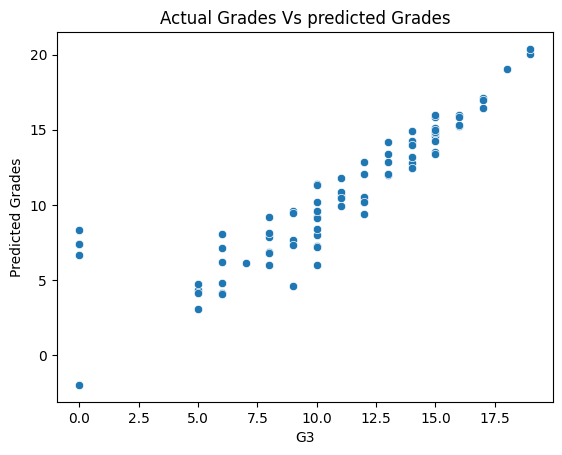

In [28]:
# Actual Grades Vs predicted Grades
sns.scatterplot(x = y_test, y = predictions)
plt.title('Actual Grades Vs predicted Grades')
plt.ylabel('Predicted Grades')

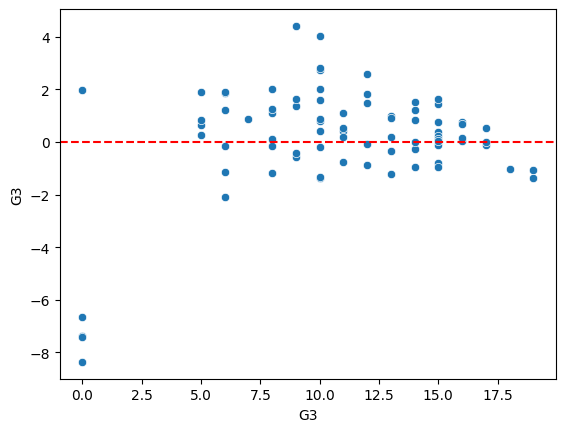

In [29]:
# plotting the residuals (error)
test_residuals = y_test - predictions
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, ls = '--', color = 'red')

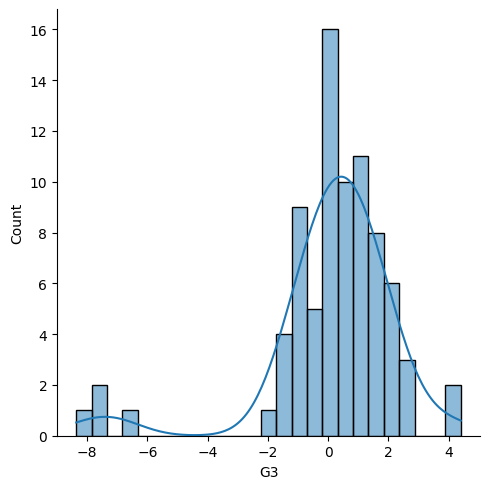

In [30]:
sns.displot(test_residuals, bins = 25, kde = True)

## 📌 Basic Conclusion from Residual Plot

- The residuals are mostly centered around **0**, which indicates that the model is not biased toward over- or under-predicting.
- Most prediction errors fall within a small range (e.g., ±2), suggesting that the model is **reasonably accurate** for the majority of students.
- The distribution is roughly bell-shaped, showing a **normal-like error pattern**, which is expected in a well-performing linear regression model.
- There are **no extreme outliers or skew**, meaning the model does not make large, frequent mistakes.

✅ **Conclusion**: The model performs well overall, with small, balanced errors — it can be trusted for general grade prediction within a ~2-point margin.


----
### Saving the model


In [31]:
from joblib import dump, load

In [32]:
final_model = LinearRegression()

In [33]:
final_model.fit(X, y)

LinearRegression()

In [35]:
dump(final_model, 'final_grades_model.joblib')

['final_grades_model.joblib']

In [36]:
loaded_model = load('final_grades_model.joblib')